<a href="https://colab.research.google.com/github/NineDERP/PatternFinal/blob/main/Copy_of_KERAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np


In [ ]:
#Define the model achitecture
model = Sequential()
model.add(Dense(512, input_shape=(784,),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

#Softmax => logistic --> (out)/sum(output) -> Probabilities. --> 0 -->1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
path="/content/drive/My Drive/data/digit.csv"
df =pd.read_csv(path)
data=pd.read_csv(path,header=None)

Mounted at /content/drive


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
X=data.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test=train_test_split(X[:,:-1],X[:,-1],test_size=0.2)

In [ ]:
Y_train

array([4, 8, 5, 3, 4, 6, 3, 1, 5, 6, 4, 9, 8, 5, 9, 6, 9, 0, 9, 8, 1, 2,
       3, 9, 3, 6, 1, 0, 6, 1, 2, 6, 2, 1, 3, 5, 4, 8, 6, 9, 7, 4, 3, 2,
       9, 2, 5, 7, 1, 1, 1, 4, 4, 1, 5, 2, 5, 5, 4, 2, 6, 8, 0, 8, 5, 3,
       8, 2, 3, 7, 6, 0, 4, 7, 1, 6, 4, 1, 8, 0, 3, 5, 0, 9, 9, 7, 6, 4,
       5, 2, 2, 5, 0, 7, 9, 0, 4, 4, 3, 5, 5, 3, 9, 3, 0, 7, 9, 5, 5, 9,
       6, 9, 9, 0, 8, 5, 9, 5, 8, 3, 5, 8, 7, 6, 8, 8, 5, 5, 3, 9, 6, 0,
       4, 1, 6, 8, 3, 9, 5, 2, 0, 0, 4, 7, 4, 7, 4, 4, 2, 1, 4, 2, 8, 3,
       9, 9, 3, 1, 9, 4, 7, 1, 2, 3, 0, 0, 4, 3, 9, 8, 8, 7, 3, 9, 0, 8,
       4, 0, 4, 1, 2, 4, 5, 5, 8, 8, 1, 8, 6, 2, 0, 3, 0, 7, 6, 6, 7, 2,
       3, 0, 6, 7, 2, 7, 0, 9, 0, 9, 3, 0, 3, 8, 7, 2, 3, 5, 4, 5, 5, 9,
       4, 6, 5, 5, 6, 9, 7, 6, 7, 0, 7, 6, 7, 1, 2, 8, 4, 7, 7, 7, 0, 7,
       4, 8, 2, 8, 1, 4, 2, 5, 0, 1, 6, 0, 0, 8, 2, 9, 5, 8, 6, 1, 9, 3,
       0, 8, 6, 6, 3, 2, 2, 9, 6, 1, 9, 2, 5, 9, 5, 1, 3, 1, 7, 4, 2, 0,
       1, 8, 7, 7, 7, 6, 7, 4, 6, 0, 7, 7, 6, 1, 1,

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
#Make the model learn
#MORE OPTIMIZER DETAILS here https://keras.io/optimizers/

In [ ]:
from keras.utils import to_categorical
y_train = keras.utils.to_categorical(Y_train, num_classes=10)
y_test = keras.utils.to_categorical(Y_test, num_classes=10)


In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:
history=model.fit(X_train, y_train, epochs=200, verbose=1,validation_data=(X_test, y_test))


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3064 - loss: 97.8846 - val_accuracy: 0.7600 - val_loss: 24.0719
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8276 - loss: 12.5562 - val_accuracy: 0.7700 - val_loss: 23.4890
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8815 - loss: 9.1285 - val_accuracy: 0.8200 - val_loss: 18.9914
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9417 - loss: 2.5090 - val_accuracy: 0.8500 - val_loss: 15.3799
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9654 - loss: 1.3214 - val_accuracy: 0.8300 - val_loss: 17.7405
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9803 - loss: 1.3213 - val_accuracy: 0.8200 - val_loss: 17.4524
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9854 - loss: 0.2993 - val_accuracy: 0.8300 - val_loss: 15.8971
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9858 - loss: 0.3669 - val_acc

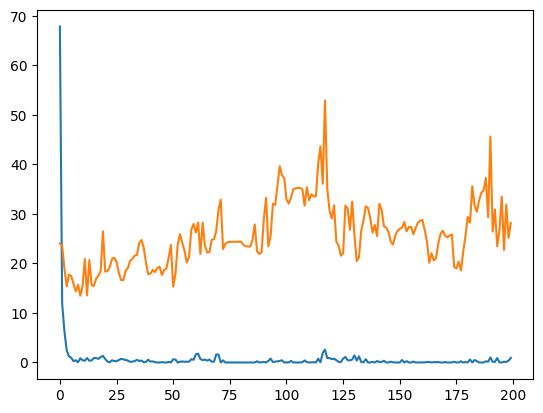

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

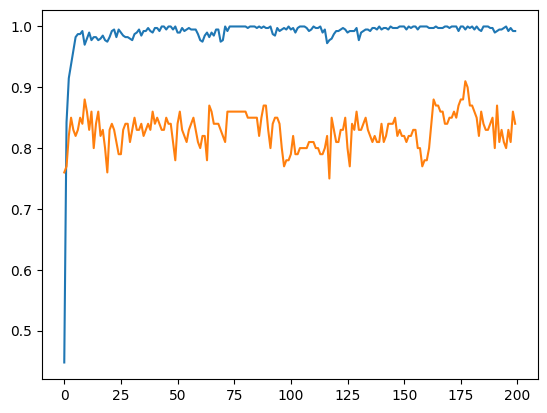

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [ ]:
X_tests=X_test/255
X_trains=X_train/255

In [ ]:
history=model.fit(X_trains, y_train, epochs=200, verbose=1,validation_data=(X_tests, y_test))


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9974 - loss: 0.3410 - val_accuracy: 0.8700 - val_loss: 0.4334
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0607 - val_accuracy: 0.8800 - val_loss: 0.4004
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0350 - val_accuracy: 0.8800 - val_loss: 0.4370
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 0.8900 - val_loss: 0.4282
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.8900 - val_loss: 0.4421
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.8900 - val_loss: 0.4635
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.8700 - val_loss: 0.4533
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.

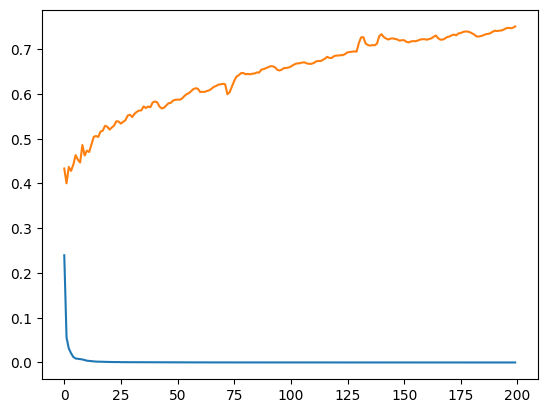

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_train)
Y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_train, Y_pred))
print('Classification Report')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']
print(classification_report(Y_train, Y_pred, target_names=target_names))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 43]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00       

In [ ]:

y_pred_test = model.predict(X_test)
Y_pred_test = np.argmax(y_pred_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_test))
print('Classification Report')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']
print(classification_report(Y_test, Y_pred_test, target_names=target_names))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  1  8  0  0  0  1  0  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 1  0  0  0  0  5  0  0  0  2]
 [ 0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  1  0  0  8  1  0]
 [ 0  0  1  1  0  0  0  0 11  0]
 [ 1  0  0  0  0  0  0  1  0  5]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.92      1.00      0.96        11
           2       0.80      0.80      0.80        10
           3       0.91      0.91      0.91        11
           4       0.89      1.00      0.94         8
           5       1.00      0.62      0.77         8
           6       0.90      1.00      0.95         9
           7       0.89      0.80      0.84        10
           8       0.92      0.85      0.88        13
           9       0.71      0.71      0.71        

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

In [ ]:
history=model.fit(X_trains, y_train, epochs=200, verbose=1,validation_data=(X_tests, y_test),callbacks=[checkpoint, early_stopping])

Epoch 1/200
 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 1.3899e-05
Epoch 1: val_loss improved from inf to 0.75226, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 1.3443e-05 - val_accuracy: 0.8900 - val_loss: 0.7523
Epoch 2/200
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 1.1709e-05
Epoch 2: val_loss did not improve from 0.75226
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 1.1732e-05 - val_accuracy: 0.8900 - val_loss: 0.7537
Epoch 3/200
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 1.2987e-05
Epoch 3: val_loss did not improve from 0.75226
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 1.3078e-05 - val_accuracy: 0.8900 - val_loss: 0.7533
Epoch 4/200
10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 1.7859e-05
Epoch 4: val_loss did not improve from 0.75226
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000

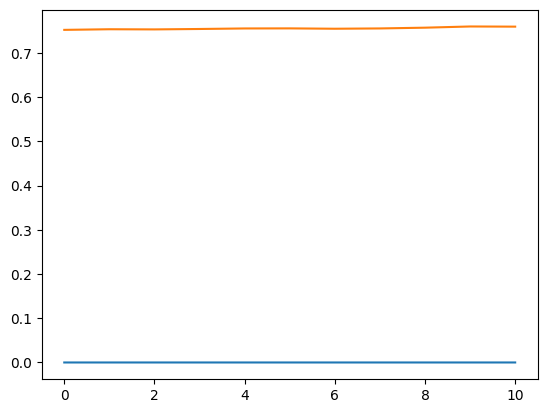

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_train)
Y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_train, Y_pred))
print('Classification Report')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']
print(classification_report(Y_train, Y_pred, target_names=target_names))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Confusion Matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 43]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00      

In [ ]:

y_pred_test = model.predict(X_test)
Y_pred_test = np.argmax(y_pred_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_test))
print('Classification Report')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']
print(classification_report(Y_test, Y_pred_test, target_names=target_names))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  1  8  0  0  0  1  0  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 1  0  0  0  0  5  0  0  0  2]
 [ 0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  1  0  0  8  1  0]
 [ 0  0  1  1  0  0  0  0 11  0]
 [ 1  0  0  0  0  0  0  1  0  5]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.92      1.00      0.96        11
           2       0.80      0.80      0.80        10
           3       0.91      0.91      0.91        11
           4       0.89      1.00      0.94         8
           5       1.00      0.62      0.77         8
           6       0.90      1.00      0.95         9
           7       0.89      0.80      0.84        10
           8       0.92      0.85      0.88        13
           9       0.71      0.71      0.71        

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)